In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

In [27]:
# Part 1: Implementing Softmax Function
# Softmax is a function that converts raw scores (logits) into probabilities.
def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))  # Preventing overflow by subtracting max value
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)  # Normalizing to sum up to 1

In [28]:
# Part 2: Prediction Function
# This function predicts the class label with the highest probability
def predict_softmax(X, W, b):
    logits = np.dot(X, W) + b  # Computing raw scores
    probabilities = softmax(logits)  # Converting the scores to probabilities
    return np.argmax(probabilities, axis=1)  # Returning the class with highest probability

In [29]:
# Part 3: Loss and Cost Functions
# Loss function measures how far off our predictions are from actual labels.
def loss_softmax(y_pred, y):
    return -np.sum(y * np.log(y_pred + 1e-9)) / y.shape[0]  # Cross-entropy loss

# Cost function calculates the average loss for all data points.
def cost_softmax(X, y, W, b):
    logits = np.dot(X, W) + b
    y_pred = softmax(logits)
    return loss_softmax(y_pred, y)

In [30]:
# Part 4: Computing Gradients
# Computes the gradient (direction of steepest descent) for weight and bias updates.
def compute_gradient_softmax(X, y, W, b):
    logits = np.dot(X, W) + b
    y_pred = softmax(logits)
    grad_W = np.dot(X.T, (y_pred - y)) / X.shape[0]  # Gradient for weights
    grad_b = np.sum(y_pred - y, axis=0) / X.shape[0]  # Gradient for biases
    return grad_W, grad_b

In [31]:
# Part 5: Gradient Descent Algorithm
# Optimizing the weights and biases by adjusting them in the direction of the gradient.
def gradient_descent_softmax(X, y, W, b, alpha, n_iter, show_cost=False):
    cost_history = []
    for i in range(n_iter):
        grad_W, grad_b = compute_gradient_softmax(X, y, W, b)
        W -= alpha * grad_W  # Updating weights
        b -= alpha * grad_b  # Updating biases
        cost = cost_softmax(X, y, W, b)  # Computing cost
        cost_history.append(cost)
        if show_cost and i % 100 == 0:
            print(f"Iteration {i}, Cost: {cost:.4f}")  # Printing the cost every 100 iterations
    return W, b, cost_history

In [32]:
# Part 6: Loading and Preparing the MNIST Dataset
# This function loads the dataset, normalizes it, and splits it into training and testing sets.
def load_and_prepare_mnist(csv_file, test_size=0.2, random_state=42):
    df = pd.read_csv(csv_file)  # Reading the dataset
    y = df.iloc[:, 0].values  # First column contains labels
    X = df.iloc[:, 1:].values / 255.0  # Normalizing the pixel values (0-255 → 0-1)
    return train_test_split(X, y, test_size=test_size, random_state=random_state)

In [33]:
# Part 7: Evaluating the Model
# Measuring how well the model performs using accuracy metrics.
def evaluate_classification(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    return cm, precision, recall, f1

In [34]:
# Loading the MNIST dataset
X_train, X_test, y_train, y_test = load_and_prepare_mnist('/content/drive/MyDrive/AI and ML/mnist_dataset.csv')

In [35]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
# Part 8: One-hot Encoding Labels
# Converting the numerical labels into binary vectors.
encoder = OneHotEncoder(sparse_output=False)
y_train = encoder.fit_transform(y_train.reshape(-1, 1))
y_test = encoder.transform(y_test.reshape(-1, 1))

In [37]:
# Part 9: Model Initialization
# Initializing the weights and biases with small random values.
num_features = X_train.shape[1]  # Number of input features (pixels)
num_classes = y_train.shape[1]  # Number of classes (digits 0-9)
W = np.random.randn(num_features, num_classes) * 0.01  # Small random weights
b = np.zeros(num_classes)  # Bias initializing to zeros

In [24]:
# Part 10: Training the Model
alpha = 0.1
n_iter = 1000
W_opt, b_opt, cost_history = gradient_descent_softmax(X_train, y_train, W, b, alpha, n_iter, show_cost=True)


Iteration 0, Cost: 0.4581
Iteration 100, Cost: 0.4236
Iteration 200, Cost: 0.4015
Iteration 300, Cost: 0.3858
Iteration 400, Cost: 0.3739
Iteration 500, Cost: 0.3645
Iteration 600, Cost: 0.3568
Iteration 700, Cost: 0.3502
Iteration 800, Cost: 0.3447
Iteration 900, Cost: 0.3398


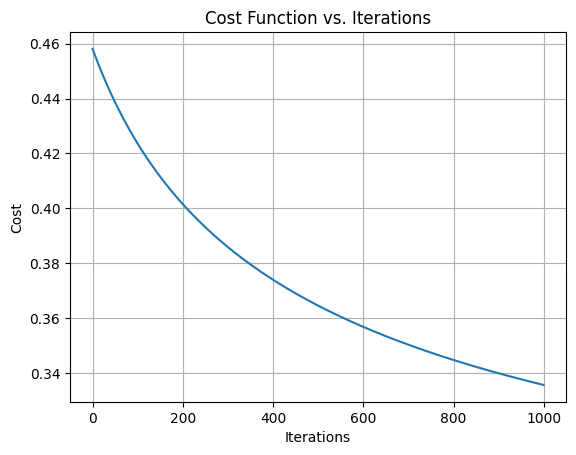

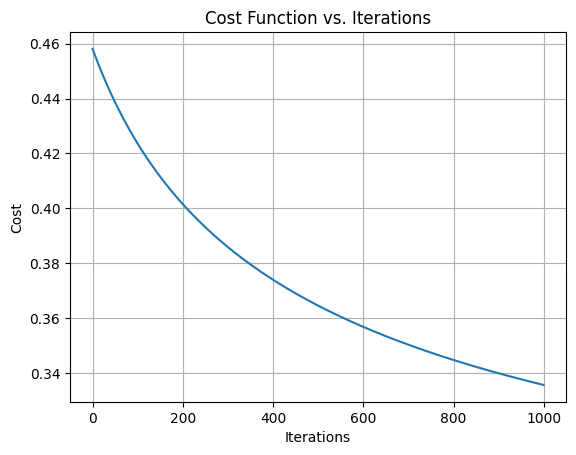

In [25]:
# Part 11: Plotting Cost Function Convergence
# Visualizing how the cost function decreases over time.
plt.plot(cost_history)
plt.title('Cost Function vs. Iterations')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.grid(True)
plt.show()

In [38]:
# Part 12: Model Evaluation
# Using the trained model to predict on the test set.
y_pred_test = predict_softmax(X_test, W_opt, b_opt)
y_test_labels = np.argmax(y_test, axis=1)  # Converting the labels back to numbers
cm, precision, recall, f1 = evaluate_classification(y_test_labels, y_pred_test)

In [39]:
# Printing the evaluation metrics
print("\nConfusion Matrix:")
print(cm)
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")



Confusion Matrix:
[[1129    0    4    2    3   10    9    2   13    3]
 [   0 1276    7   11    1    5    1    4   16    1]
 [   1   15 1034   16   19    5   26   21   29    8]
 [   8    4   35 1056    1   50    7    8   31   19]
 [   1    5    7    2 1099    0    9    4    3   46]
 [  21   13   12   42   10  930   14    7   42   13]
 [   7    2    8    1   10   14 1124    2    9    0]
 [   6   25   24    4   16    2    0 1186    6   30]
 [   9   23   12   33    9   29   14    6 1009   16]
 [   7    6   10   18   42    9    0   36    9 1057]]
Precision: 0.91
Recall: 0.91
F1-Score: 0.91


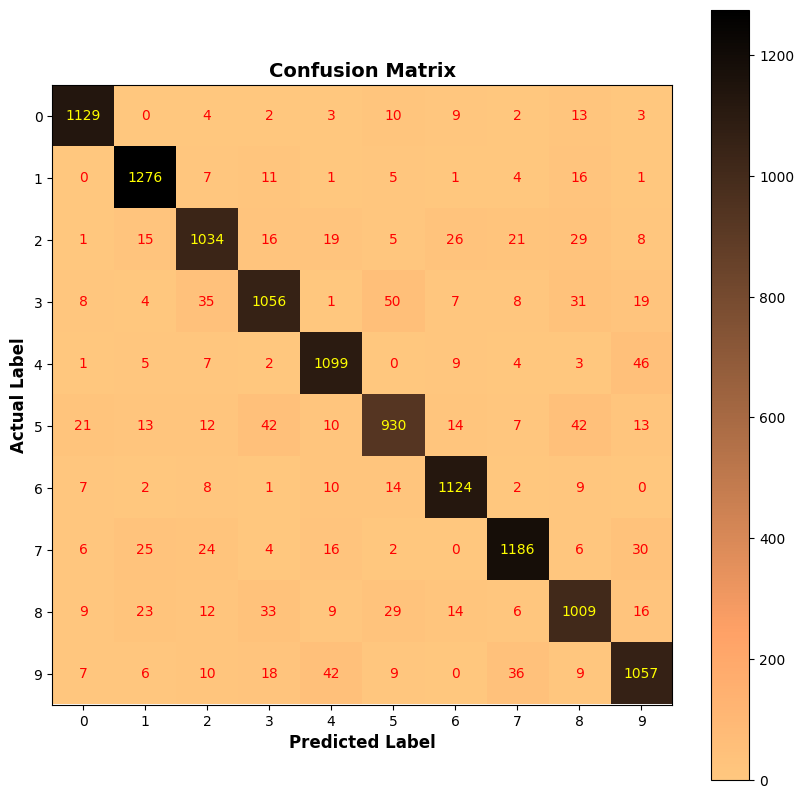

In [40]:
# Part 13: Visualizing Confusion Matrix
fig, ax = plt.subplots(figsize=(10, 10))
cax = ax.imshow(cm, cmap='copper_r', interpolation='nearest')
ax.set_xticks(np.arange(num_classes))
ax.set_yticks(np.arange(num_classes))
ax.set_xticklabels([str(i) for i in range(num_classes)], fontsize=10)
ax.set_yticklabels([str(i) for i in range(num_classes)], fontsize=10)
plt.colorbar(cax)
plt.title('Confusion Matrix', fontsize=14, fontweight='bold')
plt.xlabel('Predicted Label', fontsize=12, fontweight='bold')
plt.ylabel('Actual Label', fontsize=12, fontweight='bold')

# Adding the numbers to each cell in the confusion matrix
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='yellow' if cm[i, j] > cm.max()/2 else 'red', fontsize=10)

plt.show()